In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

In [114]:
data = pd.read_csv('Jet2_reviews.csv')
data.head()

,Unnamed: 0,rating,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified
0,0,5,I got the unfriendly fare,L Kirk,2024-01-16,United Kingdom,Swift check in service with plenty of staff ...,Boeing 737,Solo Leisure,Economy Class,Manchester to Barcelona,2023-07-01,1,4,5,5,1,yes,-1,Not Verified
1,1,2,ground and cabin staff are abrupt,Lorraine Atkinson,2024-01-02,United Kingdom,Jet2 ground and cabin staff are abrupt and un...,NaN,Couple Leisure,Economy Class,Manchester to Lanzarote,2023-12-01,2,1,-1,1,3,no,-1,Not Verified
2,2,10,"Crew friendly & efficient""",Karl Whitehead,2023-12-02,United Kingdom,First time flying with Jet2 they didn't dis...,A321 neo,Family Leisure,Economy Class,Manchester to Fuerterventura,2023-11-01,4,5,5,5,5,yes,-1,Not Verified
3,3,5,The seats are really uncomfortable,R Savage,2023-10-29,United Kingdom,So we flew out at 6.30 am. The seats are rea...,NaN,Couple Leisure,Economy Class,Athens to Manchester,2023-10-01,1,2,1,3,1,no,1,Not Verified
4,4,8,a long rung above the competition,2 reviews,2023-10-17,United Kingdom,In the UK it is pretty difficult to get a f...,Boeing 737-800,Couple Leisure,Economy Class,Funchal to East Midlands,2023-10-01,1,4,-1,4,5,yes,-1,Verified


In [115]:
data.shape

(476, 20)

In [116]:
#Let's get rid of the first 2 columns before we start our cleaning process to adjust the data types
data.drop(columns=['Unnamed: 0','author'], inplace=True)

In [117]:
data.dtypes

rating                  int64
header                 object
date                   object
place                  object
content                object
aircraft               object
traveller_type         object
seat_type              object
route                  object
date_flown             object
seat_comfort            int64
cabin_staff_service     int64
food_beverages          int64
ground_service          int64
value_for_money         int64
recommended            object
entertainment           int64
trip_verified          object
dtype: object

In [118]:
#date and date_flown needs to be modified to the right type
data['date'] = pd.to_datetime(data['date'])
data['date_flown'] = pd.to_datetime(data['date_flown'])

In [119]:
data.isnull().sum()

rating                   0
header                   0
date                     0
place                    0
content                  0
aircraft               379
traveller_type         239
seat_type                1
route                  241
date_flown             241
seat_comfort             0
cabin_staff_service      0
food_beverages           0
ground_service           0
value_for_money          0
recommended              0
entertainment            0
trip_verified          333
dtype: int64

In [120]:
# Show only the missing values
data_na = data.isnull().sum()
data_na[data_na>0]

aircraft          379
traveller_type    239
seat_type           1
route             241
date_flown        241
trip_verified     333
dtype: int64

In [121]:
#Let's have a look at the seat type since there is only one missing value
data.loc[data['seat_type'].isnull(),:]

,rating,header,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified
162,8,"cabin crew welcoming, professional and courteous",2016-06-24,United Kingdom,Have just returned from Paphos to Newcastle fl...,Boeing 737-800,Couple Leisure,NaN,NCL to PFO,2016-06-01,4,5,3,4,5,yes,-1,NaN


In [122]:
data['seat_type'].unique()

array(['Economy Class', nan], dtype=object)

In [123]:
#Since all the data shows Jet2 only offers economy class seats we can change this to Economy Class
data.loc[data['seat_type'].isnull(), 'seat_type'] = 'Economy Class'

In [124]:
#let's remove the aircraft column for now. I will look into this data in another file, 
#as I just want to have a quick overview of the data of the company.
# I will also remove the date_flown column.
data.drop(columns=['aircraft','date_flown'], inplace=True)

In [125]:
#Let's check duplicates before we look at some statistics
data.loc[data[['header', 'content']].duplicated(keep=False),:]

,rating,header,date,place,content,traveller_type,seat_type,route,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified
284,9,Jet2.com customer review,2014-09-24,United Kingdom,We travelled to New York in Nov 2013 from East...,NaN,Economy Class,NaN,5,5,-1,-1,5,yes,-1,NaN
285,9,Jet2.com customer review,2014-09-24,United Kingdom,We travelled to New York in Nov 2013 from East...,NaN,Economy Class,NaN,3,4,4,-1,3,yes,-1,NaN
301,10,Jet2.com customer review,2014-08-11,United Kingdom,Just returned from Murcia in Spain for a two w...,NaN,Economy Class,NaN,4,3,1,-1,3,no,-1,NaN
302,10,Jet2.com customer review,2014-08-11,United Kingdom,Just returned from Murcia in Spain for a two w...,NaN,Economy Class,NaN,4,4,3,-1,4,yes,-1,NaN
327,1,Jet2.com customer review,2014-05-26,United Kingdom,As I and my husband are both disabled we rang ...,NaN,Economy Class,NaN,4,4,3,-1,5,yes,-1,NaN
328,1,Jet2.com customer review,2014-05-26,United Kingdom,As I and my husband are both disabled we rang ...,NaN,Economy Class,NaN,1,1,3,-1,1,no,-1,NaN


In [126]:
data.drop_duplicates(subset=['header', 'content'], inplace=True, ignore_index=True)

In [127]:
#Let's have a look at statistics to check if we have outliers
data.describe()

,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment
count,473.000000,473.00000,473.000000,473.000000,473.000000,473.000000,473.000000
mean,6.748414,3.22833,3.665962,2.228330,1.205074,3.619450,-0.780127
std,3.344950,1.47532,1.559024,2.112985,2.512304,1.382013,0.708802
min,1.000000,-1.00000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000
25%,4.000000,2.00000,3.000000,1.000000,-1.000000,3.000000,-1.000000
50%,8.000000,4.00000,4.000000,3.000000,-1.000000,4.000000,-1.000000
75%,10.000000,4.00000,5.000000,4.000000,4.000000,5.000000,-1.000000
max,10.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


We have an issue here. Not everyone decides to rate on every items. 
Hence the impossible -1 ratings. Let's look at those columns case by case to do a simple analysis.

## Seat Comfort

In [128]:
data_seat_mask = data.copy()

In [129]:
data_seat_mask.drop(columns=['rating', 'header', 'date','place','content', 'traveller_type', 'route', 'rating', 'cabin_staff_service', 'food_beverages', 'ground_service', 'value_for_money', 'entertainment','seat_type','recommended', 'trip_verified'], inplace=True)

In [130]:
data_seat_mask.head()

,seat_comfort
0,1
1,2
2,4
3,1
4,1


In [131]:
data_seat_mask.loc[data_seat_mask['seat_comfort']==-1,:]

,seat_comfort
32,-1
33,-1
37,-1
38,-1
42,-1
48,-1
61,-1
130,-1
181,-1
285,-1


In [132]:
data_seat_mask = data_seat_mask[data_seat_mask['seat_comfort'] != -1]

In [133]:
data_seat_mask.describe()

,seat_comfort
count,460.000000
mean,3.347826
std,1.310547
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


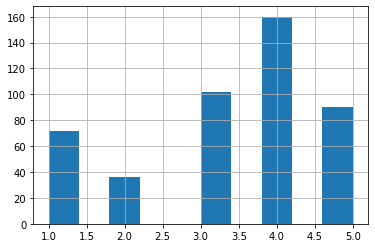

In [134]:
data_seat_mask['seat_comfort'].hist()
plt.show()

In [135]:
data_seat_mask['seat_comfort'].var()

1.7175333901676604

In [136]:
data_seat_mask['seat_comfort'].var(ddof=0)

1.7137996219281655

In [137]:
data_seat_mask['seat_comfort'].std()

1.310546981289744

In [138]:
data_seat_mask['seat_comfort'].std(ddof=0)

1.309121698669824

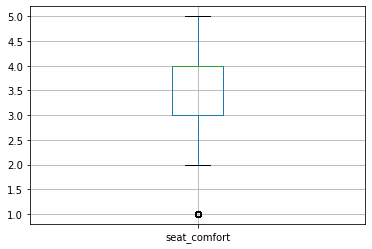

In [139]:
data_seat_mask.boxplot(column='seat_comfort')
plt.show()

Overall the seats provided seems more comfortable than average at 3.5 which makes sense since the mean is 3.3

## Cabin Staff Service 

In [140]:
data_cabin_mask = data.copy()

In [142]:
data_cabin_mask.drop(columns=['rating', 'header', 'date','place','content', 'traveller_type', 'route', 'rating', 'seat_comfort', 'food_beverages', 'ground_service', 'value_for_money', 'entertainment','seat_type','recommended', 'trip_verified'], inplace=True)

In [146]:
data_cabin_mask.loc[data_cabin_mask['cabin_staff_service']==-1,:]

,cabin_staff_service
32,-1
33,-1
37,-1
38,-1
42,-1
48,-1
61,-1
130,-1
181,-1
285,-1


In [147]:
data_cabin_mask = data_cabin_mask[data_cabin_mask['cabin_staff_service'] != -1]

In [148]:
data_cabin_mask.describe()

,cabin_staff_service
count,460.000000
mean,3.797826
std,1.365780
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


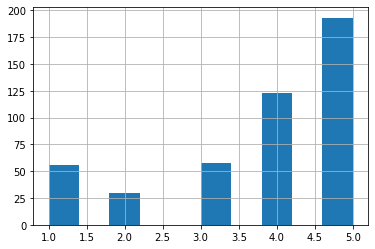

In [149]:
data_cabin_mask['cabin_staff_service'].hist()
plt.show()

In [150]:
data_cabin_mask['cabin_staff_service'].var()

1.8653547409301983

In [151]:
data_cabin_mask['cabin_staff_service'].var(ddof=0)

1.861299621928176

In [152]:
data_cabin_mask['cabin_staff_service'].std()

1.3657799020816634

In [153]:
data_cabin_mask['cabin_staff_service'].std(ddof=0)

1.3642945510146172

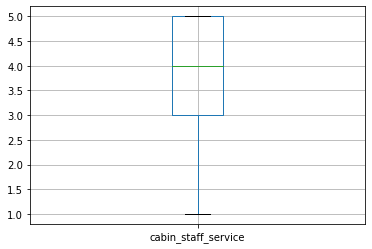

In [155]:
data_cabin_mask.boxplot(column='cabin_staff_service')
plt.show()

We can clearly see that the cabon staff has very good ratings with a mean of 3.80, with the majority of customers giving a 4 or a 5.

## Ground Service 

In [156]:
data_ground_mask = data.copy()

In [157]:
data_ground_mask.drop(columns=['rating', 'header', 'date','place','content', 'traveller_type', 'route', 'rating', 'seat_comfort', 'food_beverages', 'cabin_staff_service', 'value_for_money', 'entertainment','seat_type','recommended', 'trip_verified'], inplace=True)

In [158]:
data_ground_mask.loc[data_ground_mask['ground_service']==-1,:]

,ground_service
33,-1
37,-1
38,-1
48,-1
61,-1
...,...
468,-1
469,-1
470,-1
471,-1


In [159]:
data_ground_mask = data_ground_mask[data_ground_mask['ground_service'] != -1]

In [160]:
data_ground_mask.describe()

,ground_service
count,230.000000
mean,3.534783
std,1.548660
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


We have twice less data than for the cabin staff service.

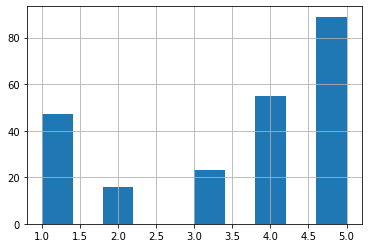

In [161]:
data_ground_mask['ground_service'].hist()
plt.show()

In [162]:
data_ground_mask['ground_service'].var()

2.398348205809751

In [163]:
data_ground_mask['ground_service'].var(ddof=0)

2.387920604914926

In [164]:
data_ground_mask['ground_service'].std()

1.5486601324402172

In [165]:
data_ground_mask['ground_service'].std(ddof=0)

1.5452898125966295

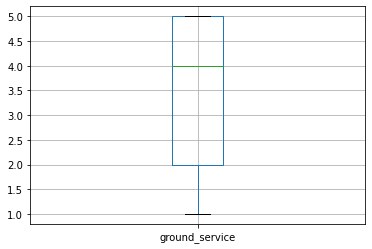

In [166]:
data_ground_mask.boxplot(column='ground_service')
plt.show()

Although the mean is at 3.53, the boxplot and the histogram shows we are here more at the extremes. The customers seems to be either impressed by the ground service or unhappy by the ground service provided.

## Entertainment 

In [167]:
data_entertainment_mask = data.copy()

In [168]:
data_entertainment_mask.drop(columns=['rating', 'header', 'date','place','content', 'traveller_type', 'route', 'rating', 'seat_comfort', 'food_beverages', 'cabin_staff_service', 'value_for_money', 'ground_service','seat_type','recommended', 'trip_verified'], inplace=True)

In [169]:
data_entertainment_mask.loc[data_entertainment_mask['entertainment']==-1,:]

,entertainment
0,-1
1,-1
2,-1
4,-1
5,-1
...,...
468,-1
469,-1
470,-1
471,-1


In [170]:
data_entertainment_mask = data_entertainment_mask[data_entertainment_mask['entertainment'] != -1]

In [172]:
data_entertainment_mask.describe()

,entertainment
count,46.000000
mean,1.260870
std,0.743409
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,5.000000


We have very limited data regarding flight entertainment. We need to investigate why. It could be related to the length of the flight.

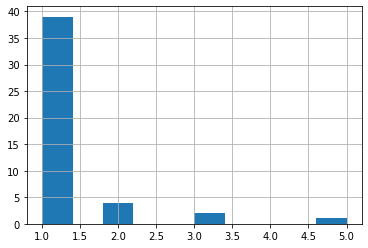

In [173]:
data_entertainment_mask['entertainment'].hist()
plt.show()

In [174]:
data_entertainment_mask['entertainment'].var()

0.5526570048309183

In [175]:
data_entertainment_mask['entertainment'].var(ddof=0)

0.5406427221172027

In [176]:
data_entertainment_mask['entertainment'].std()

0.7434090427422297

In [177]:
data_entertainment_mask['entertainment'].std(ddof=0)

0.7352841097951204

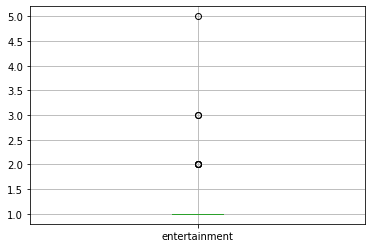

In [178]:
data_entertainment_mask.boxplot(column='entertainment')
plt.show()

We don't have a lot of data for entertainment but the ones we have show a low rating. The majority of customers rates the ratings at 1. Although, only 46 customers out of 476, which is 9.7%, took their time to rate, it is worth investigating.

## Value for Money 

In [179]:
data['value_for_money'].describe()

count    473.000000
mean       3.619450
std        1.382013
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: value_for_money, dtype: float64

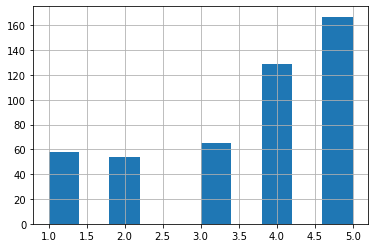

In [180]:
data['value_for_money'].hist()
plt.show()

In [181]:
data['value_for_money'].var()

1.9099598667001054

In [182]:
data['value_for_money'].var(ddof=0)

1.905921896580232

In [183]:
data['value_for_money'].std()

1.3820129763139366

In [184]:
data['value_for_money'].std(ddof=0)

1.3805513016835818

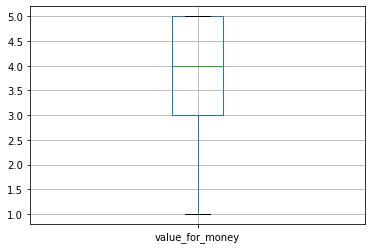

In [185]:
data.boxplot(column='value_for_money')
plt.show()

The mean is at 3.6, and the boxplot shows that the majority of the customers are satisfied (rate above 3 the average). Some improvements can be made if we look closely at the percentage of 1 and 2 ratings.

In [188]:
data[data['value_for_money'] == 1]['value_for_money'].count()

58

In [189]:
data[data['value_for_money'] == 2]['value_for_money'].count()

54

So here we can see we have 12.3% of customers who rated 1 and 11.4% of customers who rated 2. This makes a total of 23.7%. It would be worth investigating to check whether this is old data or link to some other negative ratings or complaints, as this data is not reflected on other items such as the cabin staff service. 

## Rating 

In [190]:
data['rating'].describe()

count    473.000000
mean       6.748414
std        3.344950
min        1.000000
25%        4.000000
50%        8.000000
75%       10.000000
max       10.000000
Name: rating, dtype: float64

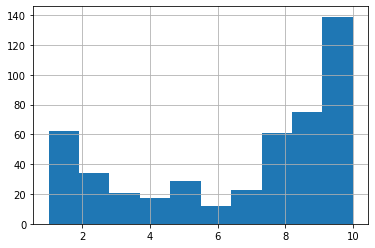

In [191]:
data['rating'].hist()
plt.show()

In [192]:
data['rating'].var()

11.188689217758952

In [193]:
data['rating'].var(ddof=0)

11.165034483683351

In [194]:
data['rating'].std()

3.3449498079581033

In [195]:
data['rating'].std(ddof=0)

3.3414120493712463

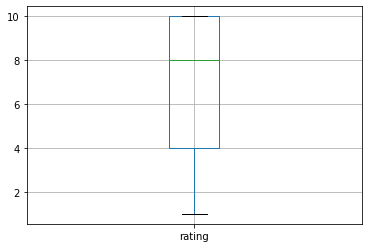

In [196]:
data.boxplot(column='rating')
plt.show()

Overall Jet2 has very good customers review with a mean of 6.75, and the dispersion varies mostly from a rating of 4 up to 10. The data shows there is a high standard deviation, which tells us customers are either very happy with Jet2 or very unhappy. This may be a lot of reasons for this, and it needs to be further investigated, crossreferencing date and other ratings to see where the negative rates come from.